**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

**Loading dataset**

In [2]:
college_raw = pd.read_excel("ForbesAmericasTopColleges2019.xls")

## **1. Understanding the data**

In [3]:
college_raw.shape

(650, 17)

There are 650 colleges with 17 different attributes (before cleaning).

In [4]:
college_raw.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


In [5]:
college_raw.describe(include = 'all')

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
count,650.00000,650,647,650,650,650.000000,650.000000,648.000000,646.000000,650.000000,635.000000,648.000000,551.000000,551.000000,553.000000,553.000000,645
unique,NaN,650,469,51,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,645
top,NaN,Cooper Union,New York,NY,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.moravian.edu
freq,NaN,1,15,68,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,325.50000,NaN,NaN,NaN,NaN,10002.692308,12022.290769,22336.947531,20031.208978,50330.175385,98851.968504,61.597222,1110.145191,1308.078040,23.278481,28.441230,NaN
std,187.78312,NaN,NaN,NaN,NaN,11162.172430,13175.091581,8269.912032,11175.869976,13223.055038,14335.249458,22.024781,127.744079,113.553237,3.729318,3.058115,NaN
min,1.00000,NaN,NaN,NaN,NaN,185.000000,386.000000,0.000000,2975.000000,0.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000,NaN
25%,163.25000,NaN,NaN,NaN,NaN,2020.250000,2240.750000,16410.000000,9288.250000,39917.000000,88600.000000,48.000000,1020.000000,1230.000000,21.000000,26.000000,NaN
50%,325.50000,NaN,NaN,NaN,NaN,4503.000000,6269.000000,21989.000000,19605.000000,50265.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000,NaN
75%,487.75000,NaN,NaN,NaN,NaN,15657.000000,17788.000000,27580.500000,27474.500000,60771.750000,105600.000000,78.000000,1180.000000,1380.000000,25.000000,31.000000,NaN


In [6]:
college_raw.nunique()

Rank                        650
Name                        650
City                        469
State                        51
Public/Private                2
Undergraduate Population    623
Student Population          639
Net Price                   638
Average Grant Aid           639
Total Annual Cost           644
Alumni Salary               354
Acceptance Rate              93
SAT Lower                    97
SAT Upper                    90
ACT Lower                    20
ACT Upper                    16
Website                     645
dtype: int64

## **2. Cleaning the data**

Removing columns we will not focus on and finding null values

In [7]:
college_raw.isnull().sum()

Rank                         0
Name                         0
City                         3
State                        0
Public/Private               0
Undergraduate Population     0
Student Population           0
Net Price                    2
Average Grant Aid            4
Total Annual Cost            0
Alumni Salary               15
Acceptance Rate              2
SAT Lower                   99
SAT Upper                   99
ACT Lower                   97
ACT Upper                   97
Website                      5
dtype: int64

Columns that are not relevant to this analysis: City, State, SAT & ACT scores. However, I will drop undergraduate population and focus on total population instead.

In [8]:
college_raw2 = college_raw.drop(['City', 'State', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper', 'Website', 'Undergraduate Population'], axis = 1)

In [9]:
college_raw2.describe(include = 'all')

,Rank,Name,Public/Private,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate
count,650.00000,650,650,650.000000,648.000000,646.000000,650.000000,635.000000,648.000000
unique,NaN,650,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cooper Union,Private,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,400,NaN,NaN,NaN,NaN,NaN,NaN
mean,325.50000,NaN,NaN,12022.290769,22336.947531,20031.208978,50330.175385,98851.968504,61.597222
std,187.78312,NaN,NaN,13175.091581,8269.912032,11175.869976,13223.055038,14335.249458,22.024781
min,1.00000,NaN,NaN,386.000000,0.000000,2975.000000,0.000000,70700.000000,5.000000
25%,163.25000,NaN,NaN,2240.750000,16410.000000,9288.250000,39917.000000,88600.000000,48.000000
50%,325.50000,NaN,NaN,6269.000000,21989.000000,19605.000000,50265.000000,96400.000000,67.000000
75%,487.75000,NaN,NaN,17788.000000,27580.500000,27474.500000,60771.750000,105600.000000,78.000000


In [10]:
college_raw2.isnull().sum()

Rank                   0
Name                   0
Public/Private         0
Student Population     0
Net Price              2
Average Grant Aid      4
Total Annual Cost      0
Alumni Salary         15
Acceptance Rate        2
dtype: int64

Now we drop the rows will null values to make the count uniform across all columns

In [11]:
college = college_raw2.dropna(axis = 0)

In [12]:
college.describe(include = 'all')

,Rank,Name,Public/Private,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate
count,628.000000,628,628,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
unique,NaN,628,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cooper Union,Private,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,384,NaN,NaN,NaN,NaN,NaN,NaN
mean,322.122611,NaN,NaN,12312.912420,22481.570064,19971.522293,50722.579618,98616.242038,61.721338
std,185.360460,NaN,NaN,13246.660229,8099.771637,11214.740998,12670.126944,14026.078146,21.795857
min,1.000000,NaN,NaN,406.000000,1298.000000,2975.000000,8646.000000,70700.000000,5.000000
25%,161.750000,NaN,NaN,2294.500000,16476.000000,9253.000000,40076.000000,88600.000000,49.000000
50%,321.500000,NaN,NaN,6538.500000,22065.000000,19605.000000,50478.000000,96300.000000,67.000000
75%,479.250000,NaN,NaN,18357.250000,27880.750000,27431.000000,60965.000000,105400.000000,78.000000


In [13]:
college.shape

(628, 9)

Now we are left with the columns we will analyze. There are now 628 rows of data and 9 columns.

## **3. Analysis**

### **3.1** What can we find between the relationship of the Rank and Student Population within these colleges

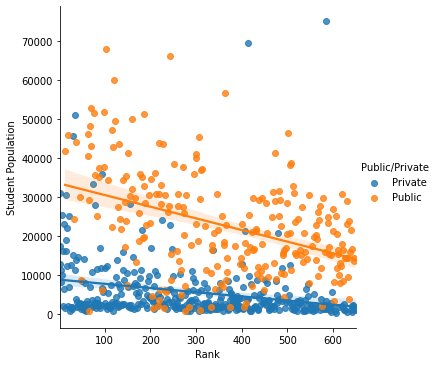

In [14]:
sns.lmplot(x="Rank", y="Student Population", hue="Public/Private",
             data=college)

Some information we can gather from this graph:
* The lower the ranking, the lower the Student Population
* Higher ranked colleges have higher Student Populations
* Overall, Public colleges have higher Student Populations

### **3.2** How does a college's Rank and Acceptance Rate relate?

<AxesSubplot:xlabel='Rank', ylabel='Acceptance Rate'>

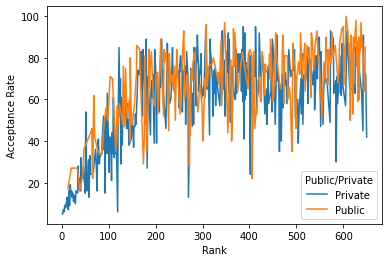

In [15]:
sns.lineplot(x="Rank", y="Acceptance Rate",
             hue="Public/Private", 
             data=college)

This shows that colleges that are ranked lower have higher acceptance rates & we can see how that differs between Private vs. Public colleges. 

### **3.3** What relationship can we find between Rank and Cost?

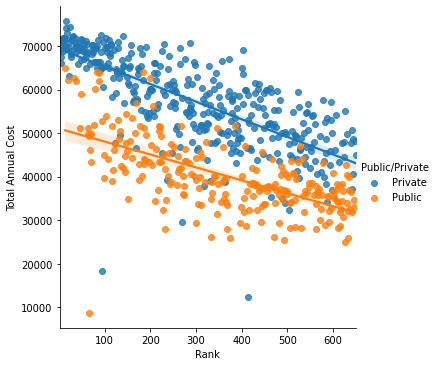

In [16]:
sns.lmplot(y='Total Annual Cost', x='Rank', hue="Public/Private", data=college)

Overall, we notice that higher ranked colleges have higher Total Annual Cost, and there is a decrease in cost as our x-value goes further to the right (as the college's rank becomes lower).

### **3.4** How do alumni salaries and college rank relate?

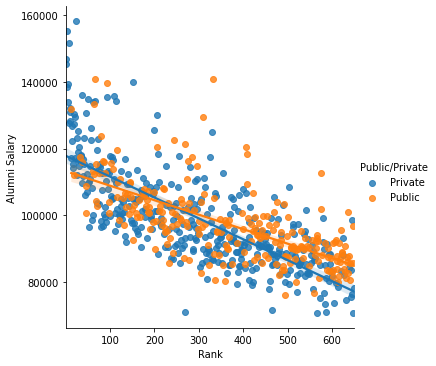

In [17]:
sns.lmplot(y='Alumni Salary', x='Rank', hue="Public/Private", data=college)

We make two conclusions based on the above scatterplot;
1. Schools with higher rankings tend to produce higher earning alumni
2. Private schools have more higher earning alumni than the public schools in the US

### **3.5** How do Average Grant Aid and Rank relate?

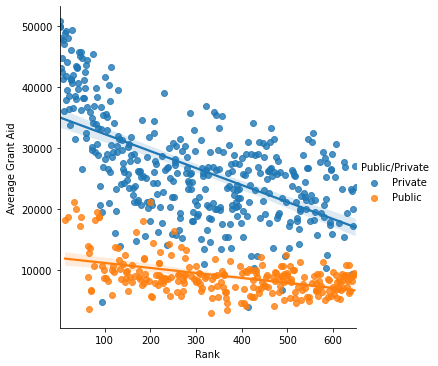

In [18]:
sns.lmplot(x='Rank', y='Average Grant Aid', hue="Public/Private", data=college)

From the scatterplot, we can conclude that colleges with a higher rank are able to provide more Student aids/grants, with private colleges taking the lead.

### **4. Conclusion**

We've analyzed the relationship between different attributes in this dataset. 
We can come to a conclusion on how the rank of a college affects its student population, acceptance rate, alumni earning potential, cost and student aid. 